# Statistics for Hackers
Notes and code from Jake VanderPlas's 2016 PyCon talk

[Talk](https://www.youtube.com/watch?v=Iq9DzN6mvYA)

[Slides](https://speakerdeck.com/pycon2016/jake-vanderplas-statistics-for-hackers)

## Intro
* A hacker is someone who approaches problem solving by writing code.

* Statistics is hard, with programming skills, it can be made easy.

* Statistics is primarily about asking the right question

* If you can write a for loop, you can do statistics

## Warm up: Simulation
If you toss a coin 30 times and see 22 heads, is it a fair coin?

Advocate: A fair coin should show ~15 or so heads so it is not a fair coin
Skeptic: Even a fair coin could show 22 heads by chance

### Classical Approach
Assume the skeptic is right: Test the *null hypothesis*.
Ask what is the probability of a fair coin showing 22 heads?

Use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) to test.


In [18]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

p =  0.00806240085512


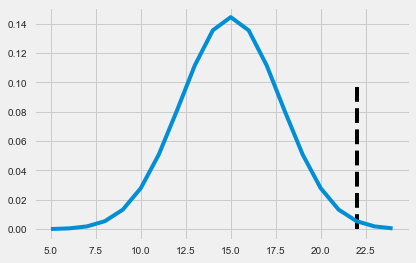

In [38]:
fig, ax = plt.subplots(1,1)
n, p = 30, 0.5
22

x = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(.9999, n, p))

ax.plot(x, binom.pmf(x, n, p))
ax.vlines(x=H, ymin=0, ymax=.1, linestyles='dashed')

print('p = ', binom.cdf(30-H, n, p))

There is a 0.8% (p = 0.008) chance of getting 22 heads. 

p < 0.05 so we reject the null hpyothesis that the coin is fair.

### Easier way: Simulate it!

In [54]:
M = 0
for i in range(100000):
    trials = np.random.randint(2, size=30)
    if trials.sum() >= 22:
        M += 1

M / 100000

0.00758